# Data Analysis and Insights Notebook

In [34]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set(color_codes=True)


In [17]:
df = pd.read_csv("netflix_titles_2021.csv")
# To display the top 5 rows 
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [18]:
df.dtypes



show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [19]:
columns_to_drop = ['cast','listed_in']
df = df.drop(columns_to_drop, axis=1)
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,NaN,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,India,"September 24, 2021",2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...


In [20]:
df.shape

(8807, 10)

In [21]:
df.duplicated()
df[df.duplicated()]

,show_id,type,title,director,country,date_added,release_year,rating,duration,description


In [22]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [23]:
df.count() 


show_id         8807
type            8807
title           8807
director        6173
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
description     8807
dtype: int64

In [24]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
country          831
date_added        10
release_year       0
rating             4
duration           3
description        0
dtype: int64

In [25]:
df = df.dropna()    # Dropping the missing values
df.count()

show_id         5747
type            5747
title           5747
director        5747
country         5747
date_added      5747
release_year    5747
rating          5747
duration        5747
description     5747
dtype: int64

In [26]:
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
description     0
dtype: int64


<Axes: xlabel='duration'>

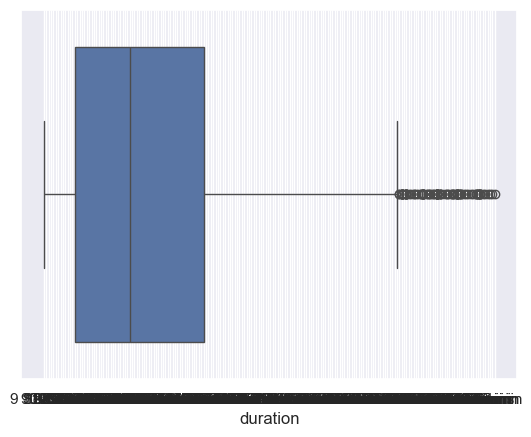

In [43]:
sns.boxplot(x=df['duration'])

In [28]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
7,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,United States,"September 24, 2021",2021,PG-13,104 min,A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,After most of her family is murdered in a terr...


In [29]:
numerical_columns = df.select_dtypes(['float64','int64']).columns
numerical_columns

Index(['release_year'], dtype='object')

In [30]:
num_df = df[numerical_columns]
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

release_year    6.0
dtype: float64


In [31]:
df = df[~((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(5177, 10)

In [40]:
df['country'].value_counts()

country
United States                         1769
India                                  786
United Kingdom                         194
Canada                                 118
Spain                                  106
                                      ... 
Singapore, Malaysia                      1
Switzerland                              1
Italy, Belgium                           1
United Kingdom, Hungary, Australia       1
United Arab Emirates, Jordan             1
Name: count, Length: 624, dtype: int64

Text(0.5, 0, 'country')

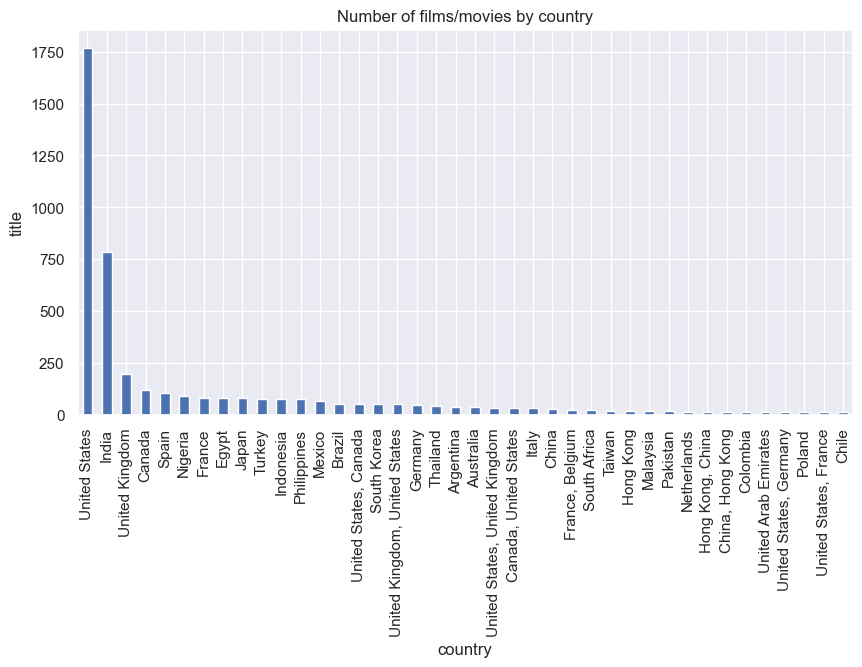

In [41]:
df['country'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of films/movies by country")
plt.ylabel('title')
plt.xlabel('country')

              release_year
release_year           1.0


<Axes: >

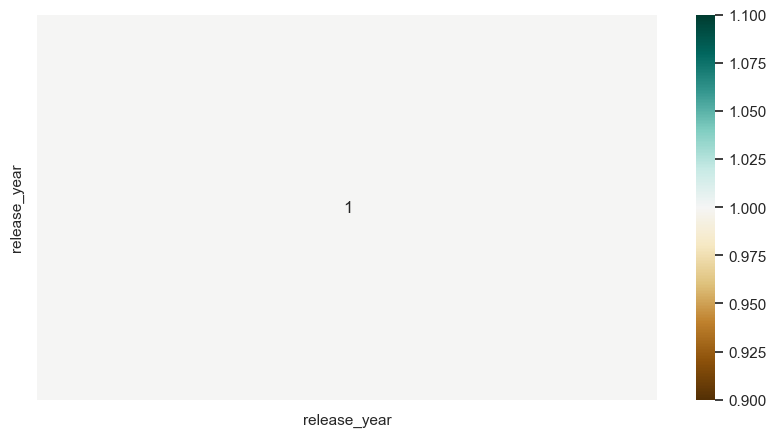

In [42]:
plt.figure(figsize=(10,5))
c= df[numerical_columns].corr()
print(c)
sns.heatmap(c,cmap="BrBG",annot=True)